In [42]:
import numpy
import pandas
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

In [26]:
dtype_dict=dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
houseprice_complete=pandas.read_csv('C:/Users/mhemani/AnacondaProjects/Coursera_MachineLearning/kc_house_data.csv',dtype=dtype_dict)
houseprice_train=pandas.read_csv('C:/Users/mhemani/AnacondaProjects/Coursera_MachineLearning/Week 3 Specific Datasets/wk3_kc_house_train_data.csv',dtype=dtype_dict)
houseprice_validation=pandas.read_csv('C:/Users/mhemani/AnacondaProjects/Coursera_MachineLearning/Week 3 Specific Datasets/wk3_kc_house_valid_data.csv',dtype=dtype_dict)
houseprice_validation_shuffled=pandas.read_csv('C:/Users/mhemani/AnacondaProjects/Coursera_MachineLearning/Week 3 Specific Datasets/wk3_kc_house_train_valid_shuffled.csv',dtype=dtype_dict)
houseprice_test=pandas.read_csv('C:/Users/mhemani/AnacondaProjects/Coursera_MachineLearning/Week 3 Specific Datasets/wk3_kc_house_test_data.csv',dtype=dtype_dict)
houseprice_set1=pandas.read_csv('C:/Users/mhemani/AnacondaProjects/Coursera_MachineLearning/Week 3 Specific Datasets/wk3_kc_house_set_1_data.csv',dtype=dtype_dict )
houseprice_set2=pandas.read_csv('C:/Users/mhemani/AnacondaProjects/Coursera_MachineLearning/Week 3 Specific Datasets/wk3_kc_house_set_2_data.csv',dtype=dtype_dict )
houseprice_set3=pandas.read_csv('C:/Users/mhemani/AnacondaProjects/Coursera_MachineLearning/Week 3 Specific Datasets/wk3_kc_house_set_3_data.csv',dtype=dtype_dict )
houseprice_set4=pandas.read_csv('C:/Users/mhemani/AnacondaProjects/Coursera_MachineLearning/Week 3 Specific Datasets/wk3_kc_house_set_4_data.csv',dtype=dtype_dict )

In [56]:
print (houseprice_complete)

               id             date      price  bedrooms  bathrooms  \
0      7129300520  20141013T000000   221900.0       3.0       1.00   
1      6414100192  20141209T000000   538000.0       3.0       2.25   
2      5631500400  20150225T000000   180000.0       2.0       1.00   
3      2487200875  20141209T000000   604000.0       4.0       3.00   
4      1954400510  20150218T000000   510000.0       3.0       2.00   
5      7237550310  20140512T000000  1225000.0       4.0       4.50   
6      1321400060  20140627T000000   257500.0       3.0       2.25   
7      2008000270  20150115T000000   291850.0       3.0       1.50   
8      2414600126  20150415T000000   229500.0       3.0       1.00   
9      3793500160  20150312T000000   323000.0       3.0       2.50   
10     1736800520  20150403T000000   662500.0       3.0       2.50   
11     9212900260  20140527T000000   468000.0       2.0       1.00   
12     0114101516  20140528T000000   310000.0       3.0       1.00   
13     6054650070  2

In [3]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = pandas.DataFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = list(map(lambda x:x ** power,feature))
    return poly_sframe

In [4]:
tmp = [1., 2., 3.]
polynomial_sframe(tmp,3)

,power_1,power_2,power_3
0,1.0,1.0,1.0
1,2.0,4.0,8.0
2,3.0,9.0,27.0


In [57]:
Dataset_variable=houseprice_set1
Dataset = Dataset_variable.sort_values(['sqft_living', 'price'])
poly15_data = polynomial_sframe(Dataset['sqft_living'], 15)
# poly15_data['price'] = Dataset['price']
model=lm.Ridge(alpha=1.23e2,normalize=True)
model.fit(poly15_data,Dataset['price'])
list(zip(model.coef_, poly15_data.columns.values))

[(2.3280680295793266, 'power_1'),
 (0.00035362160794180365, 'power_2'),
 (3.3196969177032761e-08, 'power_3'),
 (2.0008247692203763e-12, 'power_4'),
 (1.1149255943638612e-16, 'power_5'),
 (6.577861224862662e-21, 'power_6'),
 (4.1293952455053556e-25, 'power_7'),
 (2.7039375516133909e-29, 'power_8'),
 (1.8161476298896177e-33, 'power_9'),
 (1.2382427677566464e-37, 'power_10'),
 (8.518724805626126e-42, 'power_11'),
 (5.8945559766958312e-46, 'power_12'),
 (4.0954255966511638e-50, 'power_13'),
 (2.8546488930491364e-54, 'power_14'),
 (1.9954747560184625e-58, 'power_15')]

In [35]:
poly = {}
k = 1
while k < 16:
#     <dynamically create key> 
    key = k
#     <calculate value> 
    value = polynomial_sframe(Dataset['sqft_living'], k)
    poly[key] = value
    poly[key]['price'] = Dataset['price']
    k += 1
poly[15]

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,price
0,430.0,184900.0,7.950700e+07,3.418801e+10,1.470084e+13,6.321363e+15,2.718186e+18,1.168820e+21,5.025926e+23,2.161148e+26,9.292937e+28,3.995963e+31,1.718264e+34,7.388536e+36,3.177070e+39,80000.0
1,460.0,211600.0,9.733600e+07,4.477456e+10,2.059630e+13,9.474297e+15,4.358177e+18,2.004761e+21,9.221902e+23,4.242075e+26,1.951354e+29,8.976230e+31,4.129066e+34,1.899370e+37,8.737103e+39,247000.0
2,470.0,220900.0,1.038230e+08,4.879681e+10,2.293450e+13,1.077922e+16,5.066231e+18,2.381129e+21,1.119130e+24,5.259913e+26,2.472159e+29,1.161915e+32,5.461000e+34,2.566670e+37,1.206335e+40,192500.0
3,490.0,240100.0,1.176490e+08,5.764801e+10,2.824752e+13,1.384129e+16,6.782231e+18,3.323293e+21,1.628414e+24,7.979227e+26,3.909821e+29,1.915812e+32,9.387480e+34,4.599865e+37,2.253934e+40,150000.0
4,500.0,250000.0,1.250000e+08,6.250000e+10,3.125000e+13,1.562500e+16,7.812500e+18,3.906250e+21,1.953125e+24,9.765625e+26,4.882812e+29,2.441406e+32,1.220703e+35,6.103516e+37,3.051758e+40,125000.0
5,520.0,270400.0,1.406080e+08,7.311616e+10,3.802040e+13,1.977061e+16,1.028072e+19,5.345973e+21,2.779906e+24,1.445551e+27,7.516866e+29,3.908770e+32,2.032560e+35,1.056931e+38,5.496043e+40,82500.0
6,520.0,270400.0,1.406080e+08,7.311616e+10,3.802040e+13,1.977061e+16,1.028072e+19,5.345973e+21,2.779906e+24,1.445551e+27,7.516866e+29,3.908770e+32,2.032560e+35,1.056931e+38,5.496043e+40,275000.0
7,520.0,270400.0,1.406080e+08,7.311616e+10,3.802040e+13,1.977061e+16,1.028072e+19,5.345973e+21,2.779906e+24,1.445551e+27,7.516866e+29,3.908770e+32,2.032560e+35,1.056931e+38,5.496043e+40,330000.0
8,550.0,302500.0,1.663750e+08,9.150625e+10,5.032844e+13,2.768064e+16,1.522435e+19,8.373394e+21,4.605367e+24,2.532952e+27,1.393123e+30,7.662179e+32,4.214198e+35,2.317809e+38,1.274795e+41,353000.0
9,560.0,313600.0,1.756160e+08,9.834496e+10,5.507318e+13,3.084098e+16,1.727095e+19,9.671731e+21,5.416169e+24,3.033055e+27,1.698511e+30,9.511660e+32,5.326530e+35,2.982857e+38,1.670400e+41,299000.0


In [52]:
def get_rss(input_dataset,method):
    input_variable=list(input_dataset.columns.values[:-1])
    input_var_train=input_dataset[input_variable]
    output_var_train=input_dataset['price']
    if method==1:
        linear_model=lm.LinearRegression()
        linear_model.fit(X=input_var_train,y=output_var_train)
        input_var_test= input_dataset[input_variable]
        output_var_test= input_dataset['price']
        return_variable= str(mean_squared_error(output_var_test, linear_model.predict(X=input_var_test)))
    elif method==2:
        X = input_var_train
        y = output_var_train
        regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0])
        scaler = StandardScaler()
        X_std = scaler.fit_transform(X)
        model_cv = regr_cv.fit(X_std, y)
        input_var_test= input_dataset[input_variable]
        output_var_test= input_dataset['price']
        return_variable= [str(mean_squared_error(output_var_test, model_cv.predict(X=input_var_test))),model_cv.alpha_]
    return return_variable

In [53]:
method=2
rss_frame=pandas.DataFrame(columns=['Power','RSS'])
for i,frames in poly.items():
    print (i,get_rss(frames,method=method))
    rss_frame.append({'Power': i,'RSS':get_rss(frames,method=method)},ignore_index=True)
#     rss_frame.append(['A','B'],columns=list('Power','RSS'))

1 ['4.32831403296e+17', 1.0]
2 ['1.72929449218e+24', 10.0]
3 ['2.13263856834e+32', 0.10000000000000001]
4 ['1.82235876734e+40', 10.0]
5 ['2.44140696484e+48', 10.0]
6 ['4.56930816231e+56', 10.0]
7 ['9.90038869788e+64', 10.0]
8 ['5.94346099396e+74', 0.10000000000000001]
9 ['6.09523680289e+82', 0.10000000000000001]
10 ['5.28829370429e+90', 0.10000000000000001]
11 ['3.95469935433e+98', 0.10000000000000001]
12 ['2.46522998039e+106', 0.10000000000000001]
13 ['1.11815309605e+114', 0.10000000000000001]
14 ['2.04380174689e+121', 0.10000000000000001]
15 ['4.11338237116e+130', 1.0]


In [121]:
input_variable=list(poly[15].columns.values[:-1])
input_var_train=poly1_data[input_variable]
output_var_train=poly1_data['price']
input_variable
# list(poly1_data.columns.values[:-1])

['power_1',
 'power_2',
 'power_3',
 'power_4',
 'power_5',
 'power_6',
 'power_7',
 'power_8',
 'power_9',
 'power_10',
 'power_11',
 'power_12',
 'power_13',
 'power_14',
 'power_15']

In [118]:
linear_model=lm.LinearRegression()
linear_model.fit(X=input_var_train,y=output_var_train)
print (linear_model.intercept_)
print (list(zip(linear_model.coef_, input_variable)))

506800.922578
[(2.680077893972888e-77, 'power_1'), (-1.2831222987511815e-39, 'power_2'), (-1.6486971735335461e-44, 'power_3'), (-8.0493071691289846e-50, 'power_4'), (0.0, 'power_5'), (0.0, 'power_6'), (3.6286651005819432e-55, 'power_7'), (1.498074952467487e-51, 'power_8'), (5.7397448304171821e-48, 'power_9'), (1.9515834812767321e-44, 'power_10'), (5.3789708509389057e-41, 'power_11'), (9.3803561325282581e-38, 'power_12'), (-3.624783434040523e-41, 'power_13'), (4.6396840084622148e-45, 'power_14'), (-1.9650040862752037e-49, 'power_15')]


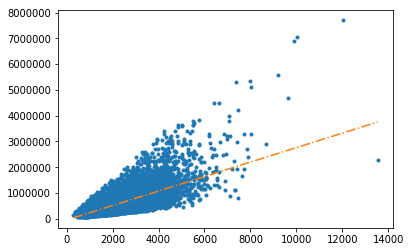

In [106]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
        poly1_data['power_1'], linear_model.predict(poly1_data[input_variable]),'-.')

In [113]:
input_var_test=
output_var_test=
str(mean_squared_error(output_var_test, linear_model.predict(X=input_var_test)))

'79626670612.1'